# Equipotential contours in the restricted 3-body problem

Figure 2.3 from Chapter 2 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Equipotential contours of the effective potential in a restricted three-body system with $f$=0.03. Units are
chosen such that $\mu$=1, $a$=1, and thus $\Omega$=1. Contours are drawn from $\Phi_{eff}$= −1.5 
to $\Phi_{eff}$=−2.25, with spacing $\Delta\Phi_{eff}$=0.075. The five Lagrange points are labeled.

In [8]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# use Newton-Raphson root solving for this plot

from scipy.optimize import newton

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  


In [9]:
plotFile = 'Fig2_3.png' 

# graphic aspect ratio = width/height

aspect = 1.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Effective Potential 

In the restricted 3-body problem, the <b>Effective Gravitational Potential</b> $\Phi_{\rm eff}$ in
the co-rotating (X,Y) coordinates is (*CSD* Chapter 2, Eqn 2.9):
\begin{equation}
   \Phi_{\rm eff}(X,Y) = -\frac{\Omega^2}{2}(X^2+Y^2) - \frac{(1-f)\mu}{R_1} - \frac{f\mu}{R_2}
\end{equation}
where:
 * $a$ = separation between the primary and secondary
 * $\mu = G(m_1+m_2)$
 * $f=m_2/(m_1+m_2)$ is the fraction of the total mass in the secondary
 * $R_1^2 = (X+fa)^2 + Y^2$ is the distance of the test mass from the primary
 * $R_2^2 = (X - [1-f]a)^2 + Y^2$ is the distance of the test mass from the secondary

Re-write this in dimensionless form in $\mu$=1, $a$=1 (so $\Omega$=1) units:

\begin{equation}
  \Phi_{\rm eff} = -\frac{1}{2}(\xi^2+\eta^2) - \frac{(1-f)}{r_1} - \frac{f}{r_2}
\end{equation}
where:
 * $\xi = X/a$ and $\eta = Y/a$ are the dimenionless cartesian coordinates
 * $f = M_2/(M_1+M_2)$ = fraction of the total mass in the secondary
 * $r_1^2 = (\xi+f)^2 + \eta^2$ = dimensionless distance of the test mass from the primary
 * $r_2^2 = (\xi-[1-f])^2 + \eta^2$ = dimensionless distance of the test mass from the secondary
 

In [10]:
def effPhi(xi,eta,f):
    r1 = np.sqrt((xi+f)**2 + eta**2)
    r2 = np.sqrt((xi-(1-f))**2 + eta**2)
    result = -0.5*(xi*xi + eta*eta) - (1-f)/r1 - f/r2
    return result

### Calculate the colinear Lagrange points numerically

This is a function $f(\xi,f)$, where $\xi$ is the dimensionless X coordinate and $f$ is the fraction of the total mass in the secondary ($f=m_2/m_1+m+2$). The function will be passed to a Newton-Raphson root solver (`scipy.optimize.newton`) to find a value for $\xi$ that satsifies the equation for a given value of $f$.

The solver will try different values of $\xi$ until the return value is equal to zero.

This is how we solve for the colinear Lagrange points numerically, rather than estimating them with 
analytic approximation formulae (see *CSD* Eqn 2.21 recast in dimensionless form).

In [11]:
def colinearLagrange(xi, f):  
    first_term = xi
    second_term = (1-f) / np.abs(xi - f)**3 * (xi - f)
    third_term = f / np.abs(xi + 1 - f)**3 * (xi + 1 - f)
    return first_term - second_term - third_term

## Make the plot

This plots equipotential contours for $f$=0.03, and contours of effective potential running from
-1.5 to -2.25 in 0.075 steps.

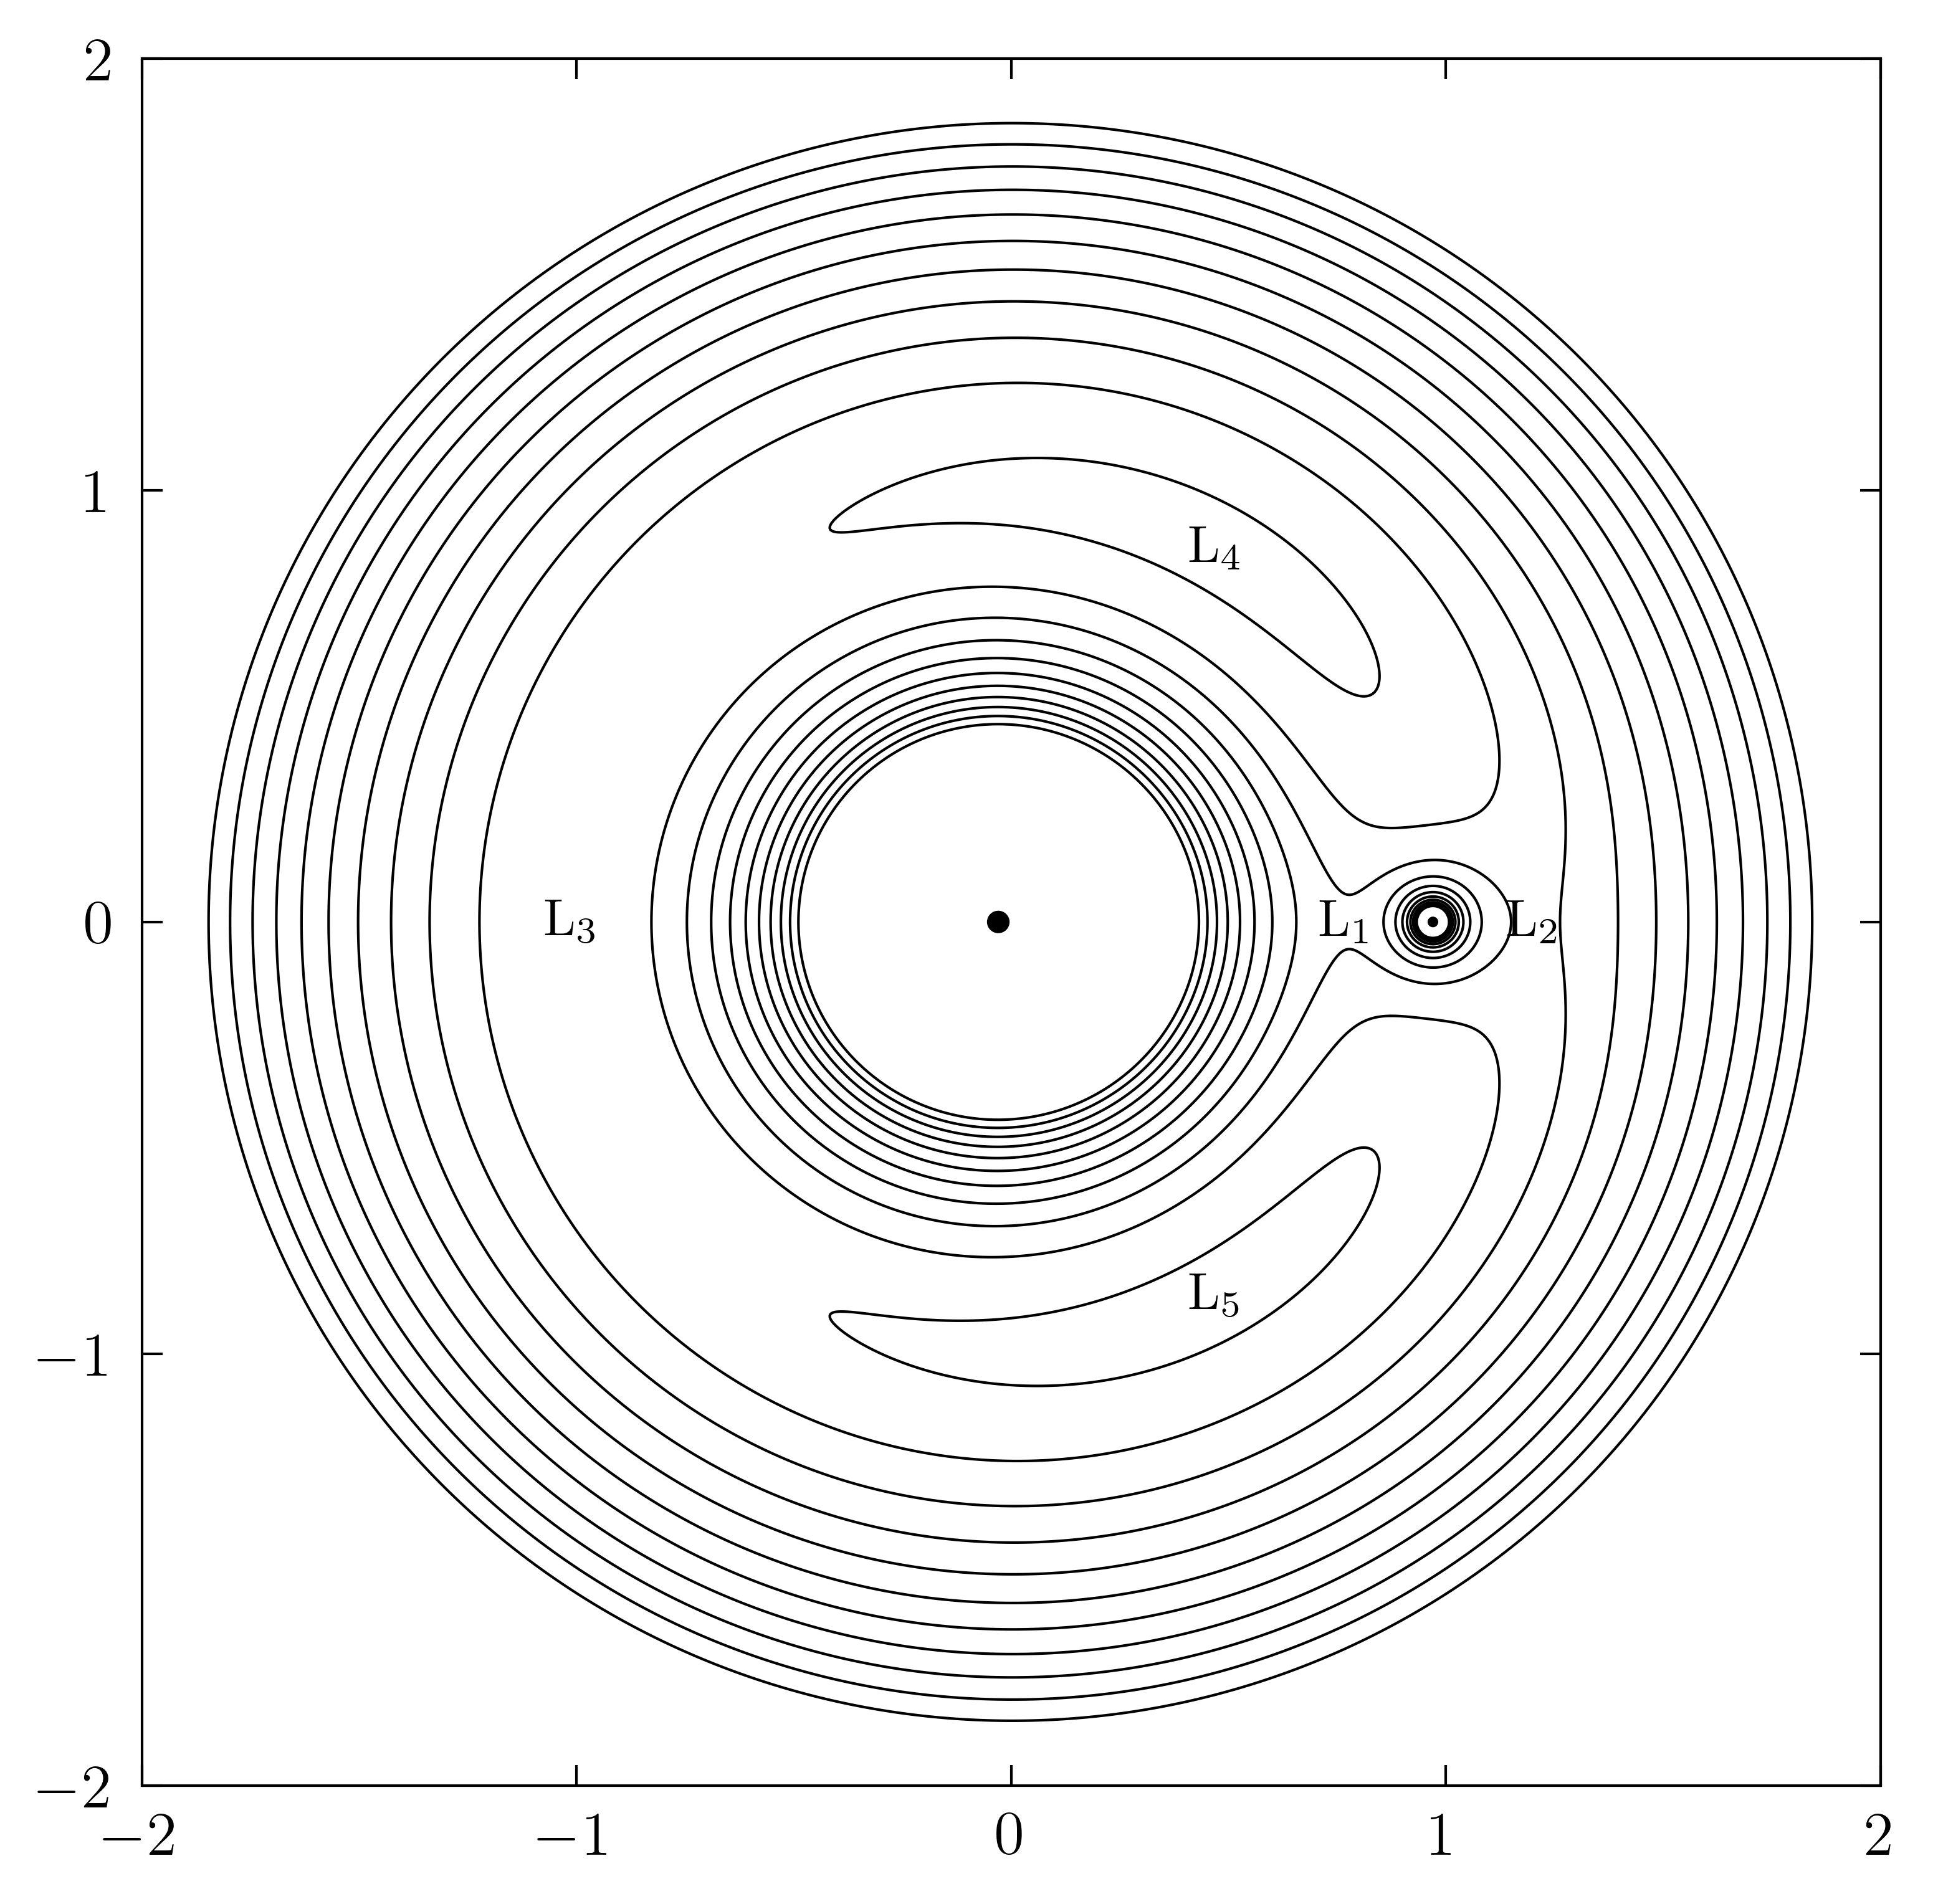

In [12]:
# fraction of total mass in the secondary

f = 0.03

# effective gravitational potential contour levels

minPhi = -2.25
maxPhi = -1.5
dPhi = 0.075 
levels = np.arange(minPhi,maxPhi+dPhi,dPhi)

# Some plotting choices here

# plot XY axis tick marks?

plotTicks = True

# Plot lagrange points as + points (True) or labels (False)

plotPoints = False

# plot the Hill radius

plotHillRadius = False

# plot the critical (Roche) potential contour

plotRoche = False

# Plot body radii - get cute and make R2/R1 proportional to cube root of the mass ratio (same bulk density)

R1 = 0.02
R2 = R1*np.cbrt(f/(1-f))

# setup the grid in xi, eta coords in the rotating frame

xg = np.linspace(-2,2,1001)

eta, xi = np.meshgrid(xg,xg)

# Numerical estimation of the colinear lagrange points (L1,L2,L3) using Newton's method to find the roots

L1 = [newton(func=colinearLagrange,x0=0 ,args=(1-f,)),0]
L2 = [newton(func=colinearLagrange,x0=1 ,args=(1-f,)),0]
L3 = [newton(func=colinearLagrange,x0=-1,args=(1-f,)),0]

# Analytic computation of L4 and L5

L4 = [0.5 - f, 0.5*np.sqrt(3)]
L5 = [0.5 - f,-0.5*np.sqrt(3)]

# xi locations of the primary and secondary (eta1=eta2=0)

xi1 = -f
xi2 = 1-f

# Hill Radius (approx)

rho_l12 = 0.5*abs(L1[0]-L2[0])

# critical (Roche) potential level (passes through L1)

critPhi = effPhi(L1[0],0,f)

# xi,eta coordinates of the lagrange points

L_points = np.array([L1,L2,L3,L4,L5])

# offset for labels if we are plotting Lagrange points as +'s

L_offset = np.array([[0.01,-0.17],[0.01,-0.1],[0.0,-0.1],[-0.075,0.05],[-0.075,-0.05]])

# Make the plot

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

if plotTicks:
    ax.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
    ax.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
else:
    ax.tick_params(bottom=False, top=False,left=False,right=False,labelbottom=False,labelleft=False,
                   which='both')
    
# 1:1 axis ratio

ax.set_xlim(-2.0, 2.0)
ax.set_xticks([-2,-1,0,1,2])
ax.set_ylim(-2.0, 2.0)
ax.set_yticks([-2,-1,0,1,2])

# compute the effective gravitational potential on the xi,eta grid and plot as contours

ePhi = effPhi(xi,eta,f)

cs = ax.contour(xi,eta,ePhi,levels=levels,colors=['black'],linestyles='solid',linewidths=0.5)

# critical (Roche) contour

if plotRoche:
    cr = ax.contour(xi,eta,ePhi,levels=[effPhi(L1[0],0,f)],colors=['black'],linestyles='solid',linewidths=0.5)

# plot and label the Lagrange points

for j in range(5):
    if plotPoints:
        ax.plot(L_points[j][0],L_points[j][1], '+', color='black', mew=0.5, ms=4, zorder=4)
        ax.text(L_points[j][0]+L_offset[j][0],L_points[j][1]+L_offset[j][1],fr'L$_{j+1}$',
                color='black',va='center',ha='center',fontsize=labelFontSize)
    else:
        ax.text(L_points[j][0],L_points[j][1],fr'L$_{j+1}$',color='black',va='center',ha='center',
                fontsize=labelFontSize)

# Plot the primary and secondary

primary = ax.add_patch(plt.Circle((xi1,0),R1,color='black',zorder=4))
secondary = ax.add_patch(plt.Circle((xi2,0),R2,color='black',zorder=4))

# Plot the Hill radius

if plotHillRadius:
    hillRad = ax.add_patch(plt.Circle((xi2,0),radius=rho_l12,lw=0.5,ls=':',color='black',fill=False,zorder=4))

# make the hardcopy

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')